## Data Preparation

###### Importing Data

In [9]:
import pandas as pd

df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv',sep=';')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      ----

###### Data cleansing

In [10]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000040                     1467681                 22  
1 2018-12-25 11:02:41.269999981                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000013                      722632                 27  
4 2018-11-22 12:53:41.529999970                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries,

In [11]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000013
Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False

In [5]:
df.groupby('is_churn').head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False
10,11,11,25436,Sepatu,2014-02-10 04:19:29.556999922,2017-07-10 13:06:00.290999889,1037207,21,True
11,12,12,35111,Sepatu,2014-12-02 03:12:43.624000072,2018-03-07 06:17:54.549999952,669514,27,True
14,15,15,146582,Jaket,2017-05-16 05:21:01.178999901,2018-07-17 04:49:05.665999889,298824,22,True
25,26,26,40931,Sepatu,2016-01-29 07:26:35.066999911,2018-05-25 11:53:37.568000078,3473946,25,True
32,33,33,91757,Sepatu,2016-08-15 05:03:03.959000111,2017-05-08 07:20:47.756999969,918079,32,True


In [6]:
# Hapus kolom-kolom yang tidak diperlukan
df=df.drop(columns=['no'])
df=df.drop(columns=['Row_Num'])

#del df['no']
#del df['Row_Num']

# Cetak lima data teratas
print(df.head())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


##### Customer acquisition by year

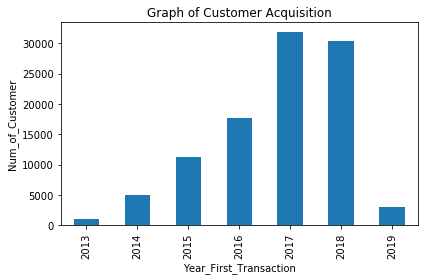

In [7]:
import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

##### Transaction by year

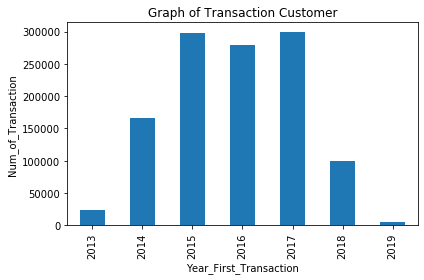

In [8]:
simport matplotlib.pyplot as plt

plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()